# Setup

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import tqdm
from transformers import pipeline

In [43]:
df = pd.read_csv('SPAM.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [44]:
nlp = spacy.load('en_core_web_sm')

In [45]:
def clean(msg: str) -> str:
    tmp = msg.lower()
    doc = nlp(tmp)
    tokens = []
    for token in doc:
        if token.lemma_ in ['lt;#&gt', '150p', '10p', 't&c', 't&cs']:
            continue
        if token.is_punct or token.is_stop or token.is_space\
        or token.like_num or token.like_url or token.like_email\
        or token.is_digit:
            continue
        if len(token.lemma_) <= 1:
            continue
        tokens.append(token.lemma_)
    return " ".join(tokens)

In [46]:
def clean_simple(msg: str) -> str:
    tmp = msg.lower()
    tmp = tmp.strip()
    tmp = tmp.replace('lt;#&gt', '')
    tmp = tmp[:128]
    return tmp

In [47]:
tqdm.tqdm.pandas()

In [48]:
df['Cleaned'] = df['Message'].progress_apply(clean)

100%|██████████| 5572/5572 [00:24<00:00, 230.69it/s]


In [49]:
df

,Category,Message,Cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts tex...
3,ham,U dun say so early hor... U c already then say...,dun early hor
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time try contact u. win pound prize claim easy...
5568,ham,Will ü b going to esplanade fr home?,go esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching act like interested buy week give...


# Analiza sentymentu

In [50]:
sentiment = pipeline('sentiment-analysis', model='finiteautomata/bertweet-base-sentiment-analysis')

In [51]:
tmp = df['Cleaned'].progress_apply(lambda x: sentiment(x)[0])
tmp = tmp.apply(pd.Series)
df = pd.concat([df, tmp], axis=1)

100%|██████████| 5572/5572 [03:04<00:00, 30.18it/s]


In [52]:
df['label'].replace({'POS': 'Positive ', 'NEG': "Negative", 'NEU': 'Neutral'}, inplace=True)
df

,Category,Message,Cleaned,label,score
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...,Neutral,0.677291
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni,Neutral,0.928279
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts tex...,Neutral,0.838302
3,ham,U dun say so early hor... U c already then say...,dun early hor,Neutral,0.942619
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live,Neutral,0.970514
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time try contact u. win pound prize claim easy...,Neutral,0.923742
5568,ham,Will ü b going to esplanade fr home?,go esplanade fr home,Neutral,0.966914
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion,Negative,0.639454
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching act like interested buy week give...,Negative,0.615731


In [53]:
df['label'].value_counts()

Neutral      3910
Positive     1044
Negative      618
Name: label, dtype: int64

In [54]:
print(df['label'].value_counts(), '\n')
print(df['label'].value_counts(normalize=True))

Neutral      3910
Positive     1044
Negative      618
Name: label, dtype: int64 

Neutral      0.701723
Positive     0.187365
Negative     0.110912
Name: label, dtype: float64


In [55]:
print(df[df['Category'] == 'ham']['label'].value_counts(), '\n')
print(df[df['Category'] == 'ham']['label'].value_counts(normalize=True))

Neutral      3313
Positive      907
Negative      605
Name: label, dtype: int64 

Neutral      0.686632
Positive     0.187979
Negative     0.125389
Name: label, dtype: float64


In [56]:
print(df[df['Category'] == 'spam']['label'].value_counts(), '\n')
print(df[df['Category'] == 'spam']['label'].value_counts(normalize=True))

Neutral      597
Positive     137
Negative      13
Name: label, dtype: int64 

Neutral      0.799197
Positive     0.183400
Negative     0.017403
Name: label, dtype: float64


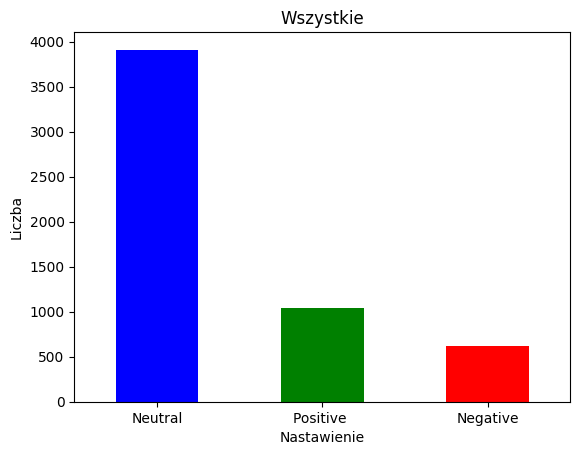

In [57]:
df['label'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Wszystkie')
plt.xlabel('Nastawienie')
plt.xticks(rotation=0)
plt.ylabel('Liczba')
plt.savefig('sentiment_all.png')
plt.show()

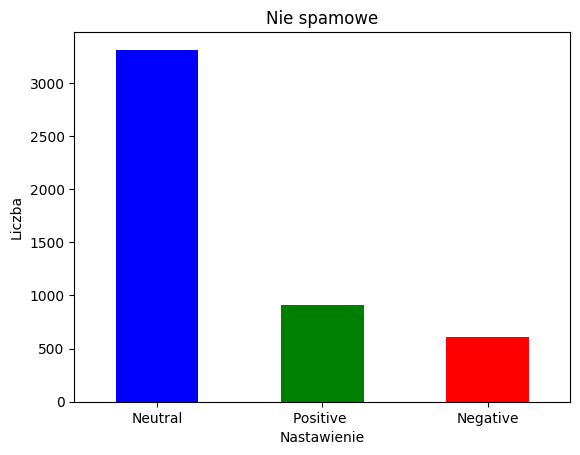

In [58]:
df[df['Category'] == 'ham']['label'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Nie spamowe')
plt.xlabel('Nastawienie')
plt.xticks(rotation=0)
plt.ylabel('Liczba')
plt.savefig('sentiment_ham.png')
plt.show()

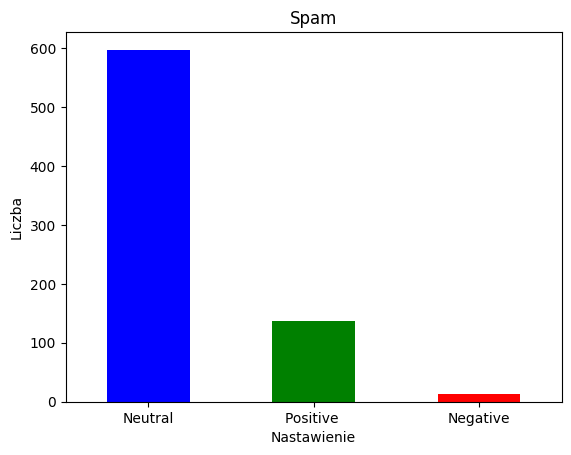

In [59]:
df[df['Category'] == 'spam']['label'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Spam')
plt.xlabel('Nastawienie')
plt.xticks(rotation=0)
plt.ylabel('Liczba')
plt.savefig('sentiment_spam.png')
plt.show()

In [60]:
df['score'].describe()

count    5572.000000
mean        0.863997
std         0.125770
min         0.432964
25%         0.811541
50%         0.914824
75%         0.957399
max         0.993003
Name: score, dtype: float64

In [61]:
df[df['Category'] == 'ham']['score'].describe()

count    4825.000000
mean        0.864408
std         0.125350
min         0.432964
25%         0.813920
50%         0.914443
75%         0.956563
max         0.993003
Name: score, dtype: float64

In [62]:
df[df['Category'] == 'spam']['score'].describe()

count    747.000000
mean       0.861337
std        0.128508
min        0.498430
25%        0.790982
50%        0.916890
75%        0.960014
max        0.992111
Name: score, dtype: float64

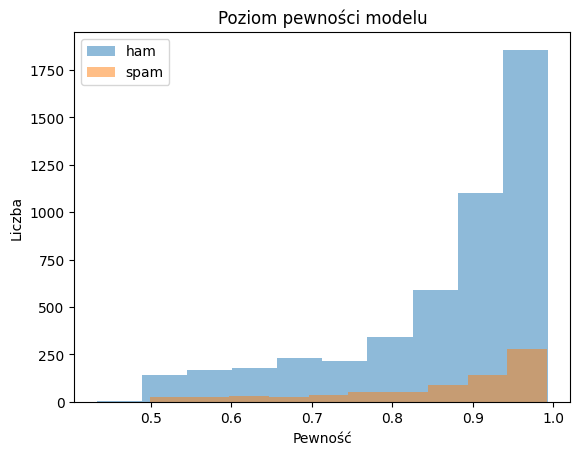

In [63]:
df['score'].groupby(df['Category']).plot(kind='hist', alpha=0.5, legend=True)
plt.title('Poziom pewności modelu')
plt.xlabel('Pewność')
plt.ylabel('Liczba')
plt.show()